# Analysis of MCL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import orthoFinderTools as oft

%load_ext autoreload
%autoreload 1
%aimport orthoFinderTools

## Read Seqence Info

In [2]:
datadir = "../data/CVTree/"
mtxlab  = "Hao.cv5"

In [3]:
# read sequence name
seqs = oft.readSeqName(datadir + mtxlab + ".name")

# Statistics Cluster

In [4]:
cutoffs = [10, 15, 20, 25, 30, 34, 36, 38, 40, 42, 45, 48]

In [5]:
# read cluster
clslist = []
for sym in cutoffs:
    cls = oft.fileClusters(datadir + mtxlab + '.' + str(sym) + ".grp")
    clslist.append(pd.DataFrame(oft.statCl(cls, seqs['GenomeIndex']).T, columns=["Ngenome", "Ngene"]))

In [6]:
# statistic full coved cluster
nfcls = []
ngnm = 20
for cutoff, cls in zip(cutoffs, clslist):
    nfgm = cls['Ngenome'].value_counts()[ngnm]
    nfgn = cls.value_counts()[ngnm,ngnm]
    nfcls.append([cutoff/100, nfgm, nfgn])
pd.DataFrame(nfcls, columns=['cutoff', 'Full', 'Solo'])

,cutoff,Full,Solo
0,0.10,2358,2346
1,0.15,2661,2646
2,0.20,2794,2775
3,0.25,2929,2887
4,0.30,2989,2884
5,0.34,3009,2848
6,0.36,3016,2817
7,0.38,3018,2774
8,0.40,3010,2727
9,0.42,2997,2649


## Show A Case

In [7]:
clsStat = clslist[3]

<Axes: >

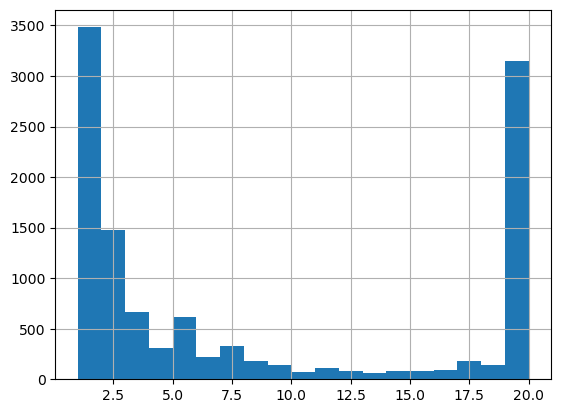

In [8]:
clsStat["Ngenome"].hist(bins = np.arange(1,21))

In [9]:
clsStat["Ngenome"].value_counts()

Ngenome
1     3482
20    2929
2     1473
3      665
5      620
7      328
4      309
6      219
19     216
17     179
8      177
18     138
9      137
11     107
16      87
14      84
15      83
12      78
10      73
13      61
Name: count, dtype: int64

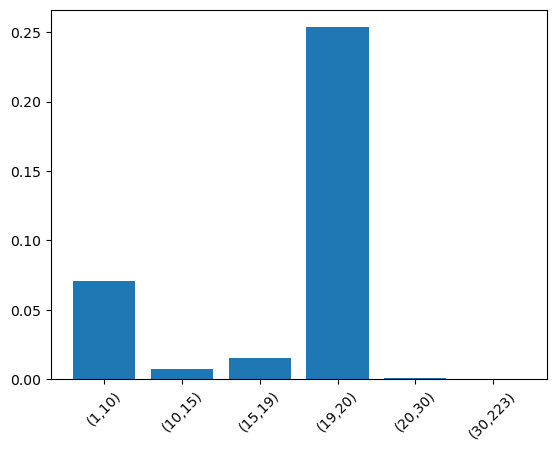

In [10]:
hist,bins = np.histogram(clsStat['Ngene'], density=True,
         bins=[min(clsStat['Ngene']), 10, 15, 19.1, 20.1, 30, max(clsStat['Ngene'])])
xlabel = ['('+str(int(x[0]))+',' + str(int(x[1])) + ')' for x in np.column_stack((bins[:-1],bins[1:]))]
plt.bar(xlabel, hist)
plt.xticks(rotation=45)
plt.show()

In [11]:
clsStat["Ngene"].value_counts()

Ngene
1     3417
20    2902
2     1479
3      645
5      632
      ... 
50       1
49       1
48       1
46       1
34       1
Name: count, Length: 66, dtype: int64